# **Assessment 1**

For our first assessment, our goal is to solve an imputation problem: we will create a neural network architecture that learns how to recover missing portions of an image.

This is an important problem in magnetic resonance imaging (MRI), where patient scans are often limited to a few areas to avoid lengthy scanning times.

In particular, we are going to focus on images of human heads. We have managed to gain access to one hundred images of patient's heads but, unfortunately, these images have a significant portion of missing information. Your goal during the assessment is to design a neural network that can recover these missing portions.

<br>

---

<br>

We do not have access to the labels for the images we want to recover, so we will have to be a bit creative to obtain a workable dataset on which to train our neural network.

Fortunately for us, we have access to a generative model that has been trained to produce realistic-looking MRI images of patient's heads. Using this model, you will create an appropriate dataset to train your architecture. We have provided you with the basic setup code to start using this generative model in **Question 1** below.

The corrupted images that we want to recover are contained in the numpy file `test_set.npy` of this repository. The file contains 100 patient images with a size of 64x64 pixels.

The architecture that you design in this assessment should use the artificially-generated dataset in order to recover the missing information in the images contained in `test_set.npy`.

<br>

All answers to the assessment should be contained within the structure below, but you are free to add new code and text cells as required to your answers. Read the text for each question and follow the instructions carefully. Answers that do not follow this structure will not be marked. **Do NOT change the name of this file.**

Please, **make sure to execute all your cells and save the result of the execution**. We will only mark cells that have been executed and will not execute any cells ourselves.

<br>

---

<br>

<br><br>

## **Question 1**  (25%)

Using the provided image-generation network, create a dataset of brain images that will later be used to train your chosen architecture.

Given that you will likely want to use this dataset multiple times during training, we recommend that you save the generated images to an appropriate folder in your GDrive.

Once you have generated your dataset, load and display ten of your generated images here.

We have also provided you with some corrupted images in the file `test_set.npy` of this repository. You should also load and display ten of these corrupted images here.

Below, we have provided template code, including some required downloads and installations, so that you can easily use the trained generative model. Sample generation in this model is done using the function `generate`, and is controlled by some input arguments. It is your job to figure out a sensible set of parameters that will produce images that are useful for the requirements of your task.

<br>

In [1]:
try: #taking this from the lectures
  from google.colab import drive
  drive.mount('/content/drive')
except:
  pass

Mounted at /content/drive


In [2]:
import os
import sys
import random
import numpy as np
import torch
import matplotlib.pyplot as plt

In [3]:
def set_seed(seed): # function comming from all the lectures
    """
    Use this to set ALL the random seeds to a fixed value and take out any randomness from cuda kernels
    """
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)

    torch.backends.cudnn.benchmark = True  ##uses the inbuilt cudnn auto-tuner to find the fastest convolution algorithms. -
    torch.backends.cudnn.enabled   = True

    return True

def set_device(device="cpu", idx=0): # it also comes from the lectures
    if device != "cpu":
        if torch.cuda.device_count() > idx and torch.cuda.is_available():
            print("Cuda installed! Running on GPU {} {}!".format(idx, torch.cuda.get_device_name(idx)))
            device="cuda:{}".format(idx)
        elif torch.cuda.device_count() > 0 and torch.cuda.is_available():
            print("Cuda installed but only {} GPU(s) available! Running on GPU 0 {}!".format(torch.cuda.device_count(), torch.cuda.get_device_name()))
            device="cuda:0"
        else:
            device="cpu"
            print("No GPU available! Running on CPU")
    return device

device = set_device("cuda")

# I am setting the seed
seed = 42
set_seed(seed)

Cuda installed! Running on GPU 0 Tesla T4!


True

In [12]:
# Pull and install necessary files
!unzip /content/drive/MyDrive/cw1_files.zip -d ./
!chmod +x run.sh
!bash ./run.sh
sys.path.append('/content/ese-invldm')

Archive:  /content/drive/MyDrive/cw1_files.zip
  inflating: ./files/config_training.yml  
replace ./run.sh? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: ./run.sh                
  inflating: ./ese-invldm/setup.py   
  inflating: ./files/default_config.yml  
  inflating: ./ese-invldm/ese_invldm/ese_invldm.py  
  inflating: ./ese-invldm/ese_invldm/__init__.py  
  inflating: ./files/autoencoder/autoencoder_ckpt_latest.pth  
  inflating: ./files/diffusion/diffusion_ckpt_latest.pth  
Directory InverseLDM already exists. Skipping clone.


In [5]:
save_dir = "/content/drive/My Drive/generated_images"  # Path to save the brain images
test_set_path = "/content/drive/My Drive/test_set.npy" # Path to load corrupted images
os.makedirs(save_dir, exist_ok=True)

In [15]:
from ese_invldm import generate

"""
Generates samples using a diffusion-based generative model.

This function leverages a pre-configured diffusion model to produce synthetic samples.
The sampling process supports adjustable parameters for total samples, inference steps, and batch size.
A scheduler and temperature can also be configured to control the sampling behaviour.

Parameters:
    num_samples (int):
        Total number of samples to generate.
    num_inference_steps (int):
        Number of diffusion inference steps.
        The minimum number of steps is 1, but we recommend exploring the range from 10 to 50.
        Please note that more steps will increase quality but also the computational cost. Be careful not
        to burn through your credits by using a very large number of steps!
    batch_size (int):
        Number of samples to process in each batch during sampling.
    scheduler (str, optional):
        Sampling scheduler to use (e.g., "ddim", "ddpm"). You can quickly test which one provides the most appropriate results
        for this task.
    temperature (float, optional):
        Sampling temperature to control randomness, given as a number between 0 and 1. Higher values produce more diverse outputs.
    seed (int, optional):
        Random seed for reproducibility. Defaults to 42.

Returns:
    list:
        A list containing the batches of generated samples, where each sample
        corresponds to a single data instance produced by the diffusion model.

"""
samples = generate(
    num_samples=1000,       # Number of images to generate
    num_inference_steps=30,  # Higher steps = better quality
    batch_size=10,         # Batch size
    scheduler="ddim",      # Sampling strategy
    temperature=0.8,       # Randomness control
    seed=seed              # Ensures reproducibility
)




Batch 0


100%|██████████| 30/30 [00:03<00:00,  8.78it/s]


Batch 1


100%|██████████| 30/30 [00:03<00:00,  8.83it/s]


Batch 2


100%|██████████| 30/30 [00:03<00:00,  8.85it/s]


Batch 3


100%|██████████| 30/30 [00:03<00:00,  8.85it/s]


Batch 4


100%|██████████| 30/30 [00:03<00:00,  8.44it/s]


Batch 5


100%|██████████| 30/30 [00:03<00:00,  8.69it/s]


Batch 6


100%|██████████| 30/30 [00:03<00:00,  8.75it/s]


Batch 7


100%|██████████| 30/30 [00:03<00:00,  8.78it/s]


Batch 8


100%|██████████| 30/30 [00:03<00:00,  8.73it/s]


Batch 9


100%|██████████| 30/30 [00:03<00:00,  8.74it/s]


Batch 10


100%|██████████| 30/30 [00:03<00:00,  8.72it/s]


Batch 11


100%|██████████| 30/30 [00:03<00:00,  8.80it/s]


Batch 12


100%|██████████| 30/30 [00:03<00:00,  8.77it/s]


Batch 13


100%|██████████| 30/30 [00:03<00:00,  8.76it/s]


Batch 14


100%|██████████| 30/30 [00:03<00:00,  8.71it/s]


Batch 15


100%|██████████| 30/30 [00:03<00:00,  8.76it/s]


Batch 16


100%|██████████| 30/30 [00:03<00:00,  8.80it/s]


Batch 17


100%|██████████| 30/30 [00:03<00:00,  8.83it/s]


Batch 18


100%|██████████| 30/30 [00:03<00:00,  8.80it/s]


Batch 19


100%|██████████| 30/30 [00:03<00:00,  8.74it/s]


Batch 20


100%|██████████| 30/30 [00:03<00:00,  8.81it/s]


Batch 21


100%|██████████| 30/30 [00:03<00:00,  8.78it/s]


Batch 22


100%|██████████| 30/30 [00:03<00:00,  8.83it/s]


Batch 23


100%|██████████| 30/30 [00:03<00:00,  8.75it/s]


Batch 24


100%|██████████| 30/30 [00:03<00:00,  8.75it/s]


Batch 25


100%|██████████| 30/30 [00:03<00:00,  8.76it/s]


Batch 26


100%|██████████| 30/30 [00:03<00:00,  8.80it/s]


Batch 27


100%|██████████| 30/30 [00:03<00:00,  8.77it/s]


Batch 28


100%|██████████| 30/30 [00:03<00:00,  8.73it/s]


Batch 29


100%|██████████| 30/30 [00:03<00:00,  8.77it/s]


Batch 30


100%|██████████| 30/30 [00:03<00:00,  8.76it/s]


Batch 31


100%|██████████| 30/30 [00:03<00:00,  8.76it/s]


Batch 32


100%|██████████| 30/30 [00:03<00:00,  8.76it/s]


Batch 33


100%|██████████| 30/30 [00:03<00:00,  8.74it/s]


Batch 34


100%|██████████| 30/30 [00:03<00:00,  8.80it/s]


Batch 35


100%|██████████| 30/30 [00:03<00:00,  8.80it/s]


Batch 36


100%|██████████| 30/30 [00:03<00:00,  8.78it/s]


Batch 37


100%|██████████| 30/30 [00:03<00:00,  8.74it/s]


Batch 38


100%|██████████| 30/30 [00:03<00:00,  8.72it/s]


Batch 39


100%|██████████| 30/30 [00:03<00:00,  8.80it/s]


Batch 40


100%|██████████| 30/30 [00:03<00:00,  8.77it/s]


Batch 41


100%|██████████| 30/30 [00:03<00:00,  8.76it/s]


Batch 42


100%|██████████| 30/30 [00:03<00:00,  8.72it/s]


Batch 43


100%|██████████| 30/30 [00:03<00:00,  8.77it/s]


Batch 44


100%|██████████| 30/30 [00:03<00:00,  8.77it/s]


Batch 45


100%|██████████| 30/30 [00:03<00:00,  8.77it/s]


Batch 46


100%|██████████| 30/30 [00:03<00:00,  8.74it/s]


Batch 47


100%|██████████| 30/30 [00:03<00:00,  8.69it/s]


Batch 48


100%|██████████| 30/30 [00:03<00:00,  8.77it/s]


Batch 49


100%|██████████| 30/30 [00:03<00:00,  8.77it/s]


Batch 50


100%|██████████| 30/30 [00:03<00:00,  8.75it/s]


Batch 51


100%|██████████| 30/30 [00:03<00:00,  8.70it/s]


Batch 52


100%|██████████| 30/30 [00:03<00:00,  8.78it/s]


Batch 53


100%|██████████| 30/30 [00:03<00:00,  8.79it/s]


Batch 54


100%|██████████| 30/30 [00:03<00:00,  8.76it/s]


Batch 55


100%|██████████| 30/30 [00:03<00:00,  8.73it/s]


Batch 56


100%|██████████| 30/30 [00:03<00:00,  8.74it/s]


Batch 57


100%|██████████| 30/30 [00:03<00:00,  8.79it/s]


Batch 58


100%|██████████| 30/30 [00:03<00:00,  8.78it/s]


Batch 59


100%|██████████| 30/30 [00:03<00:00,  8.79it/s]


Batch 60


100%|██████████| 30/30 [00:03<00:00,  8.74it/s]


Batch 61


100%|██████████| 30/30 [00:03<00:00,  8.74it/s]


Batch 62


100%|██████████| 30/30 [00:03<00:00,  8.77it/s]


Batch 63


100%|██████████| 30/30 [00:03<00:00,  8.76it/s]


Batch 64


100%|██████████| 30/30 [00:03<00:00,  8.75it/s]


Batch 65


100%|██████████| 30/30 [00:03<00:00,  8.71it/s]


Batch 66


100%|██████████| 30/30 [00:03<00:00,  8.77it/s]


Batch 67


100%|██████████| 30/30 [00:03<00:00,  8.75it/s]


Batch 68


100%|██████████| 30/30 [00:03<00:00,  8.74it/s]


Batch 69


100%|██████████| 30/30 [00:03<00:00,  8.72it/s]


Batch 70


100%|██████████| 30/30 [00:03<00:00,  8.74it/s]


Batch 71


100%|██████████| 30/30 [00:03<00:00,  8.79it/s]


Batch 72


100%|██████████| 30/30 [00:03<00:00,  8.76it/s]


Batch 73


100%|██████████| 30/30 [00:03<00:00,  8.76it/s]


Batch 74


100%|██████████| 30/30 [00:03<00:00,  8.71it/s]


Batch 75


100%|██████████| 30/30 [00:03<00:00,  8.78it/s]


Batch 76


100%|██████████| 30/30 [00:03<00:00,  8.77it/s]


Batch 77


100%|██████████| 30/30 [00:03<00:00,  8.77it/s]


Batch 78


100%|██████████| 30/30 [00:03<00:00,  8.75it/s]


Batch 79


100%|██████████| 30/30 [00:03<00:00,  8.74it/s]


Batch 80


100%|██████████| 30/30 [00:03<00:00,  8.78it/s]


Batch 81


100%|██████████| 30/30 [00:03<00:00,  8.41it/s]


Batch 82


100%|██████████| 30/30 [00:03<00:00,  8.71it/s]


Batch 83


100%|██████████| 30/30 [00:03<00:00,  7.67it/s]


Batch 84


100%|██████████| 30/30 [00:04<00:00,  7.16it/s]


Batch 85


100%|██████████| 30/30 [00:03<00:00,  8.72it/s]


Batch 86


100%|██████████| 30/30 [00:03<00:00,  8.76it/s]


Batch 87


100%|██████████| 30/30 [00:03<00:00,  8.58it/s]


Batch 88


100%|██████████| 30/30 [00:03<00:00,  8.36it/s]


Batch 89


100%|██████████| 30/30 [00:03<00:00,  8.71it/s]


Batch 90


100%|██████████| 30/30 [00:03<00:00,  8.50it/s]


Batch 91


100%|██████████| 30/30 [00:03<00:00,  8.78it/s]


Batch 92


100%|██████████| 30/30 [00:03<00:00,  8.75it/s]


Batch 93


100%|██████████| 30/30 [00:03<00:00,  8.76it/s]


Batch 94


100%|██████████| 30/30 [00:03<00:00,  8.78it/s]


Batch 95


100%|██████████| 30/30 [00:03<00:00,  8.78it/s]


Batch 96


100%|██████████| 30/30 [00:03<00:00,  8.77it/s]


Batch 97


100%|██████████| 30/30 [00:03<00:00,  8.74it/s]


Batch 98


100%|██████████| 30/30 [00:03<00:00,  8.77it/s]


Batch 99


100%|██████████| 30/30 [00:03<00:00,  8.77it/s]


In [17]:
# Combine all generated images into a single NumPy array
all_images = []

for batch in samples:
    all_images.extend(tensor.cpu().numpy() for tensor in batch)  # Append all images from each batch to the list

all_images = np.array(all_images)  # Convert the list to a NumPy array

# Save all images to a single `.npy` file
output_file = os.path.join(save_dir, "all_generated_images.npy")
np.save(output_file, all_images)
print(f"All generated images saved to {output_file}")



All generated images saved to /content/drive/My Drive/generated_images/all_generated_images.npy


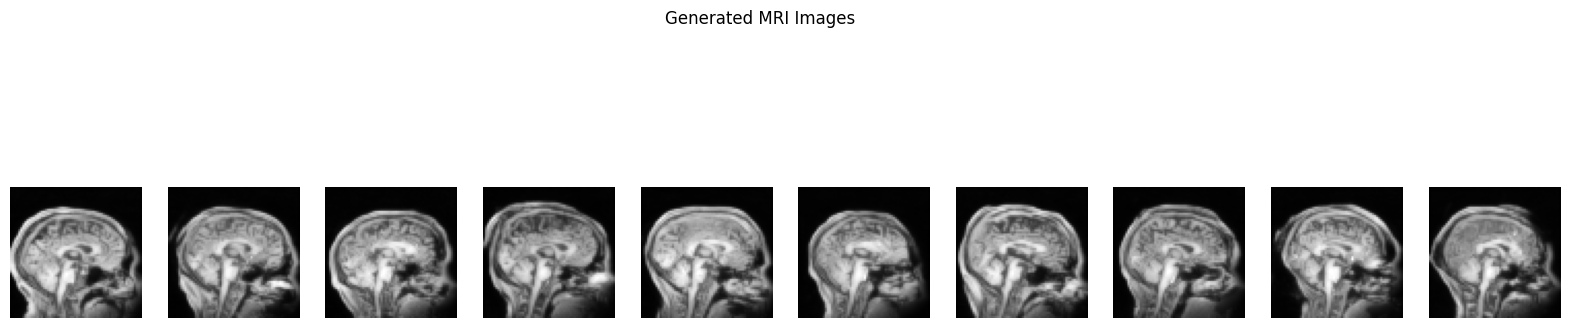

In [22]:
# Display 10 randomly selected generated images
fig, axes = plt.subplots(1, 10, figsize=(20, 5))
for ax, img in zip(axes, all_images[:10]):  # Select first 10 images
    ax.imshow(img.squeeze(), cmap="gray")
    ax.axis("off")
plt.suptitle("Generated MRI Images")
plt.show()

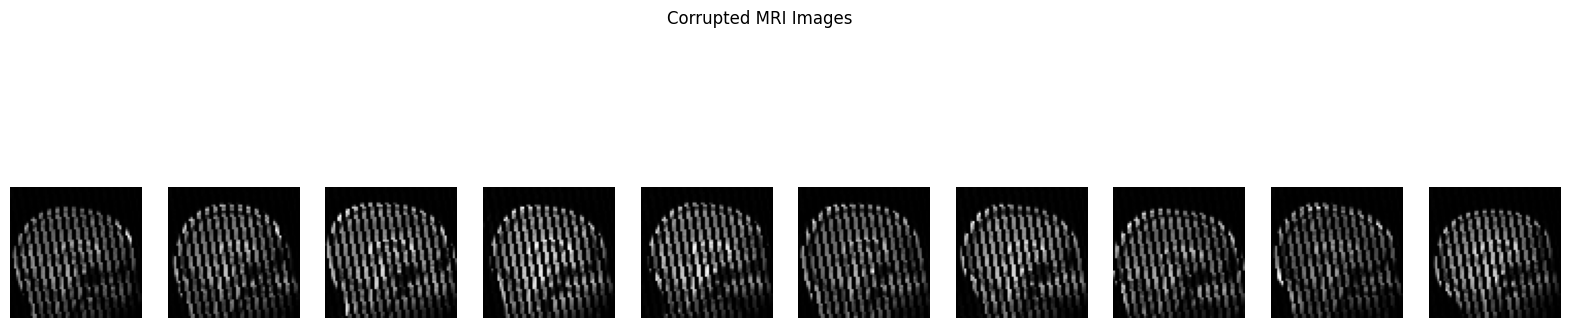

In [21]:
# Load corrupted images from `test_set.npy`
corrupted_images = np.load(test_set_path)

# Display 10 corrupted images
fig, axes = plt.subplots(1, 10, figsize=(20, 5))
for ax, img in zip(axes, corrupted_images[:10]):
    ax.imshow(img.squeeze(), cmap="gray")
    ax.axis("off")
plt.suptitle("Corrupted MRI Images")
plt.show()

In [23]:
print("Shape of the dataset:", all_images.shape)

Shape of the dataset: (1000, 1, 64, 64)


In [29]:
# Step 2: Check pixel intensity values
print("Pixel value range:")
print(" Min:", np.min(all_images))
print(" Max:", np.max(all_images))
print(" Mean:", np.mean(all_images))

Pixel value range:
 Min: 0.00825
 Max: 0.658
 Mean: 0.192


In [25]:
if np.isnan(all_images).any():
    print("Dataset contains NaN values.")
else:
    print("No NaN values found in the dataset.")

No NaN values found in the dataset.


In [26]:
if np.isinf(all_images).any():
    print("Dataset contains infinite values.")
else:
    print("No infinite values found in the dataset.")

No infinite values found in the dataset.


<br>

---

<br>

## **Question 2**  (25%)

Using the data generated in **Question 1**, create a PyTorch `TensorDataset` and a `DataLoader` for the training set.

Using the provided corrupted images inside `test_set.npy`, create another `TensorDataset` and a `DataLoader` for the test set.

The training dataset should provide batches of brain images generated in **Question 1** and should corrupt these images appropriately so that they resemble images in the test set. The dataset should also pair each image with its corresponding un-corrupted image as a label.

The test dataset should provide the corrupted images provided, for which no labels are available.

Display here ten images of your training dataset and ten images of your test dataset, and their corresponding labels when available.

<br>



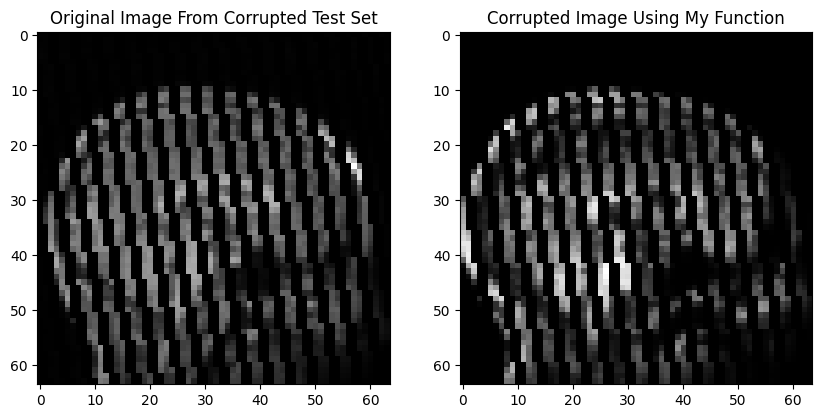

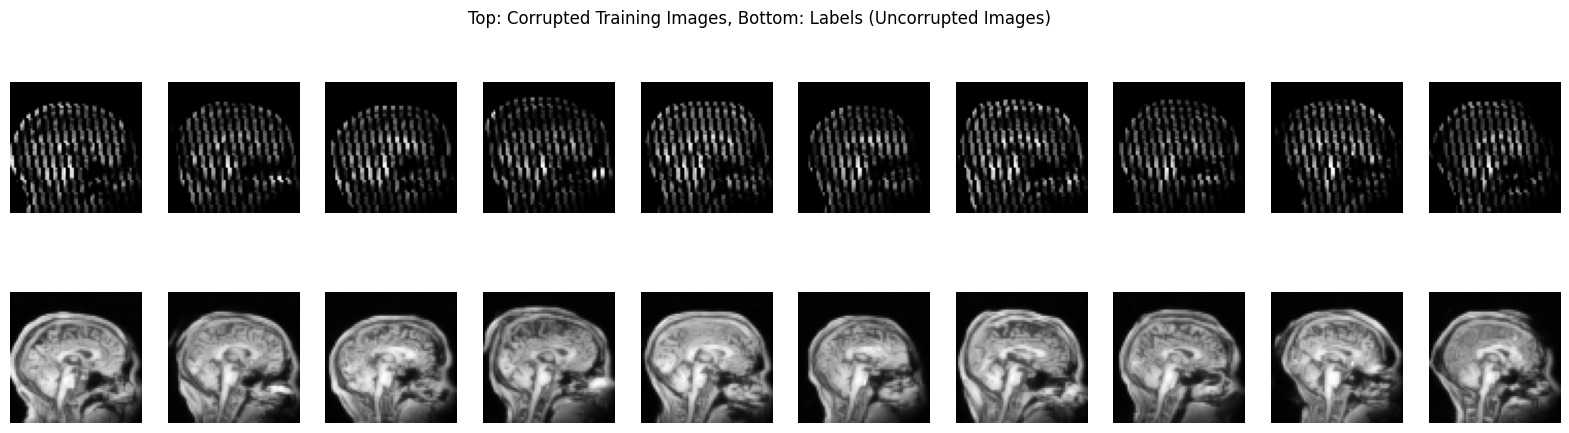

In [113]:
import torch
from torch.utils.data import DataLoader, TensorDataset
# Step 1: Load the generated images (from Question 1) and test set images
all_generated_images_path = os.path.join(save_dir, "all_generated_images.npy")
all_generated_images = np.load(all_generated_images_path)
test_set_images = np.load(test_set_path)  # Corrupted test set images

# Step 2: Define a function to corrupt images
def corrupt_image(image):
    """
    Corrupt an image by setting every `step`-th pixel in each row to black (0),
    with each row offset by 1 pixel compared to the row above.

    Args:
        image (np.ndarray): Input image to corrupt (2D or 3D array).
        step (int): Spacing between blacked-out pixels in each row.

    Returns:
        np.ndarray: Corrupted image with staggered black pixels.
    """
    # Remove channel dimension if present (e.g., [1, 64, 64] -> [64, 64])
    if image.shape[0] == 1:  # Grayscale images with a single channel
        image = image.squeeze(axis=0)  # Remove the channel dimension

    corrupted = image.copy()  # Create a copy of the original image
    height, width = corrupted.shape  # Now guaranteed to be 2D

    # Apply the corruption
    for row in range(height):
        corrupted[row, ((row // 6) % 4)::4] = 0  # Set every 3-th pixel to 0
        corrupted[row, (( (row // 6) % 4 )+ 1)::4] = 0  # Set every 3-th pixel to 0

    corrupted = np.power(corrupted, 2.3)
    return corrupted

# Step 3: Create the training dataset
# Corrupt the generated images


corrupted_train_images = np.array([corrupt_image(img) for img in all_generated_images])

# Convert to PyTorch tensors
train_inputs = torch.tensor(corrupted_train_images, dtype=torch.float32).unsqueeze(1)  # Add channel dimension
train_labels = torch.tensor(all_generated_images, dtype=torch.float32).unsqueeze(1)  # Add channel dimension

# Create a TensorDataset and DataLoader for training
train_dataset = TensorDataset(train_inputs, train_labels)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

# Step 4: Create the test dataset
# Convert test set images to PyTorch tensors
test_inputs = torch.tensor(test_set_images, dtype=torch.float32).unsqueeze(1)  # Add channel dimension

# Create a TensorDataset and DataLoader for testing
test_dataset = TensorDataset(test_inputs)  # No labels for the test set
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

sample_image = all_generated_images[0]
corrupted_sample = corrupt_image(sample_image)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(test_set_images[0].squeeze(), cmap="gray")
plt.title("Original Image From Corrupted Test Set")
plt.subplot(1, 2, 2)
plt.imshow(corrupted_sample.squeeze(), cmap="gray")
plt.title("Corrupted Image Using My Function")
plt.show()

# Step 5: Visualize 10 images from the training dataset
fig, axes = plt.subplots(2, 10, figsize=(20, 5))
for i in range(10):
    axes[0, i].imshow(train_inputs[i, 0].numpy().squeeze(), cmap="gray")  # Corrupted image
    axes[0, i].axis("off")
    axes[1, i].imshow(train_labels[i, 0].numpy().squeeze(), cmap="gray")  # Uncorrupted image (label)
    axes[1, i].axis("off")
plt.suptitle("Top: Corrupted Training Images, Bottom: Labels (Uncorrupted Images)")
plt.show()



<br>

---

<br>

## **Question 3** (50%)

Using the dataset created in **Question 2**, design and train an architecture to recover the missing image lines of the provided test dataset.

Once you have trained your architecture, display here ten images of the test set with the recovered lines filled in.

Additionally, save the test data with the missing values filled in into a numpy file called `test_set_nogaps.npy`. These images should be **in the same order** as those in the `test_set.npy` file and should have the same pixel size of 64x64. **Any images not contained in the `test_set_nogaps.npy` file or incorrectly ordered will not be marked.**

You have freedom to choose an architecture that you consider appropriate to solve this problem. However, you will need to train your chosen architecture as part of the assessment: **pre-trained networks are not allowed**.

You will be assessed by the quality of your predictions of the missing data values and additional marks will be given for originality in your network design choices. You should include, as part of your answer, a paragraph explaining the architecture you have chosen and any additional design choices and hyperparameters that have been important to build your solution.

This is an open-book assessment and you are encouraged to use resources online, including  tools like chatGPT. However, make sure to always mention the sources for your code and ideas, including websites, papers, and tools like chatGPT.

<br>


<br>

---

<br>